In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.tree import plot_tree 
from sklearn.model_selection import GridSearchCV 

In [4]:
#exercise 1
df_iris=pd.read_csv("iris_teach_2.csv")
print(df_iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  iris_name  
0    setosa  
1    setosa  
2    setosa  
3    setosa  
4    setosa  


In [5]:
#exercise 2
missing_values = df_iris.isnull().sum()
print("Count of missing values in each column: ")
print(missing_values)

Count of missing values in each column: 
sepal length (cm)    1
sepal width (cm)     1
petal length (cm)    0
petal width (cm)     1
iris_name            1
dtype: int64


In [6]:
#exercise 3
df_iris.dropna(inplace=True)
missing_values_after = df_iris.isnull().sum()
print("\nCount of missing values in each column after removing rows:")
print(missing_values_after)


Count of missing values in each column after removing rows:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
iris_name            0
dtype: int64


In [7]:
#exercise 4
X = df_iris.drop(columns=["iris_name"])
Y = df_iris["iris_name"]

In [8]:
#exercise 5
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)
print("Encoded classes:", label_encoder.classes_)

Encoded classes: ['setosa' 'versicolor' 'virginica']


In [9]:
#exercise 6
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

Accuracy: 1.00


[Text(0.3076923076923077, 0.9285714285714286, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'X[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'X[3] <= 1.65\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'X[3] <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'X[2] <= 4.95\nentropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'X[3] <= 1.55\nentropy = 0.918\nsa

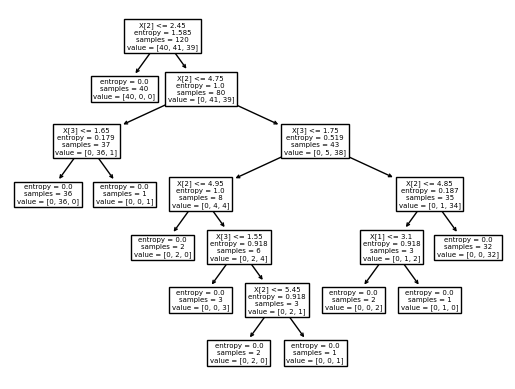

In [13]:
#exercise 7
#df_iris.drop(columns=["petal width (cm)"], inplace=True)

tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42) 
tree_clf.fit(X_train, y_train)
Y_pred = tree_clf.predict(X_test) 
accuracy = accuracy_score(y_test, Y_pred) 
print("Accuracy: {:.2f}".format(accuracy))
plot_tree(tree_clf)

In [14]:
#exercise 8
param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7]} 
grid_search = GridSearchCV(tree_clf, param_grid, cv=5) 
grid_search.fit(X_train, y_train) 
print("Best hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 6}
Best Score: 0.9416666666666668
